In [2]:
import pandas as pd

In [3]:
iris=pd.read_csv('intracity_fare_train.csv')
data = pd.DataFrame(iris)

In [4]:
list(iris)
iris=iris.assign(prod=iris['DISTANCE']*iris['TRAFFIC_STUCK_TIME'])
df= pd.DataFrame(iris)

In [5]:
from math import pi
import numpy as np
from numpy import arcsin,sin ,arctan2,cos
tc = pi/2;
R = 6371
def latlon(lat1, lon1, d):
    lat1 *= pi/180
    lon1 *= pi/180
    lat =arcsin(sin(lat1)*np.cos(d/R)+cos(lat1)*sin(d)*cos(tc))
    dlon=arctan2(sin(tc)*sin(d/R)*cos(lat1),cos(d)-sin(lat1)*sin(lat))
    lon=np.mod( lon1-dlon+pi,2*pi )-pi
    lat *= 180/pi
    lon *= 180/pi
    lon[lon < 0] = 180 - np.abs(lon[lon < 0])
    lat[lat < 0] = 180 - np.abs(lat[lat < 0])
    return lat,lon

In [6]:
# imputing missing destination coordinates
#print(df.shape)
df.dropna(subset=['STARTING_LATITUDE', 'DESTINATION_LATITUDE'], how='all',inplace=True)
#print(df.shape)
df[['STARTING_LATITUDE','DESTINATION_LATITUDE']] = df[['STARTING_LATITUDE','DESTINATION_LATITUDE']].fillna(value=0)

temp = df['DESTINATION_LATITUDE']==0
# print(interfare[temp])
df.loc[temp,'DESTINATION_LATITUDE'],df.loc[temp, 'DESTINATION_LONGITUDE'] = latlon(df.loc[temp,'STARTING_LATITUDE'], df.loc[temp,'STARTING_LONGITUDE'], df.loc[temp,'DISTANCE']/2)
temp = df['STARTING_LATITUDE']==0
df.loc[temp,'STARTING_LATITUDE'],df.loc[temp, 'STARTING_LONGITUDE'] = latlon(df.loc[temp,'DESTINATION_LATITUDE'], df.loc[temp,'DESTINATION_LONGITUDE'], df.loc[temp,'DISTANCE']/2)
#df
# print(interfare[temp])
#df.dropna()

In [7]:
iris.describe()

,ID,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
count,20000.000000,19325.000000,19325.000000,19337.000000,19337.000000,5648.000000,5648.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,20.111445,79.794135,20.129680,79.793273,15.447238,9.433605,30.066750,30.543050,251.926063,1042.231000
std,5773.647028,5.908449,4.939736,5.909585,4.941561,8.558223,5.779630,21.951902,12.123407,300.067490,991.608729
min,1.000000,12.842900,72.835882,12.843029,72.835873,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,5000.750000,13.086064,77.093570,13.087377,77.087018,8.000000,4.000000,12.000000,22.000000,42.097500,252.750000
50%,10000.500000,19.231625,77.705107,19.235435,77.706558,15.000000,9.000000,26.000000,31.000000,75.330000,731.000000
75%,15000.250000,25.317237,82.990730,25.317921,82.990571,23.000000,14.000000,45.000000,40.000000,416.130000,1560.000000
max,20000.000000,28.770716,88.452179,28.770713,88.452149,30.000000,19.000000,95.000000,99.000000,1972.000000,8099.000000


In [8]:
iris.drop_duplicates(subset=[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME',
 'DISTANCE',
 'FARE'],inplace=True)
iris

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09,272
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99,2244
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33,53
3,4,2016-04-26 18:10:09,NaN,NaN,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21,1674
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62,1452
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,AC bus,NaN,NaN,23,43,59.82,989
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,taxi Non ac,22.0,0.0,61,34,586.36,2074
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,Bus,NaN,NaN,28,18,32.27,504
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,Taxi AC,12.0,18.0,69,43,1122.08,2967
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,metro,NaN,NaN,17,19,23.54,323


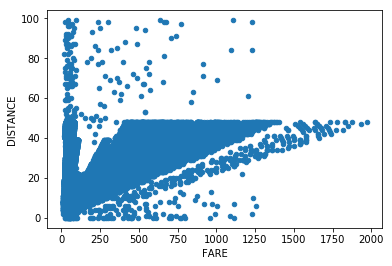

In [9]:
%matplotlib inline
iris.plot(kind="scatter", y="DISTANCE", x="FARE")

In [10]:

df['VEHICLE_TYPE']=df['VEHICLE_TYPE'].apply(lambda x: x.upper())


In [11]:
df

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,BUS,NaN,NaN,8,34,32.09,272
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,TAXI AC,7.0,9.0,66,34,985.99,2244
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,TAXI NON AC,18.0,6.0,53,1,1085.33,53
3,4,2016-04-26 18:10:09,28.758291,77.112421,28.758384,77.011422,METRO,NaN,NaN,54,31,56.21,1674
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,BUS,NaN,NaN,33,44,30.62,1452
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,AC BUS,NaN,NaN,23,43,59.82,989
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,TAXI NON AC,22.0,0.0,61,34,586.36,2074
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,BUS,NaN,NaN,28,18,32.27,504
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,TAXI AC,12.0,18.0,69,43,1122.08,2967
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,METRO,NaN,NaN,17,19,23.54,323


In [12]:
# Importing some visualization libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

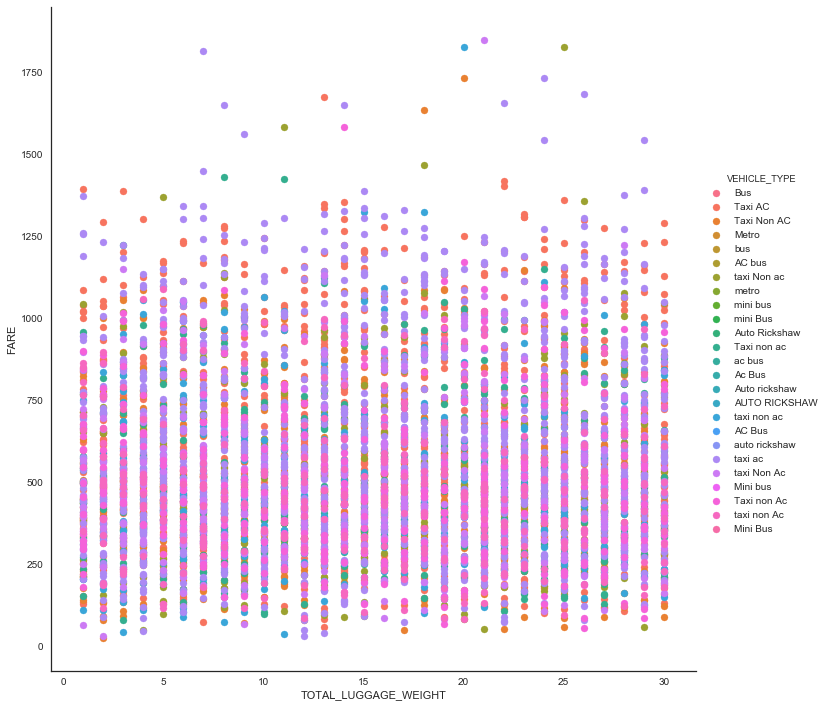

In [13]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="VEHICLE_TYPE", size=10) \
   .map(plt.scatter, "TOTAL_LUGGAGE_WEIGHT", "FARE") \
   .add_legend()

In [14]:
iris['TOTAL_LUGGAGE_WEIGHT'].describe()

count    5648.000000
mean       15.447238
std         8.558223
min         1.000000
25%         8.000000
50%        15.000000
75%        23.000000
max        30.000000
Name: TOTAL_LUGGAGE_WEIGHT, dtype: float64

In [15]:
df['TOTAL_LUGGAGE_WEIGHT']=df['TOTAL_LUGGAGE_WEIGHT'].fillna(7)

In [16]:
df

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,BUS,7.0,NaN,8,34,32.09,272
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,TAXI AC,7.0,9.0,66,34,985.99,2244
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,TAXI NON AC,18.0,6.0,53,1,1085.33,53
3,4,2016-04-26 18:10:09,28.758291,77.112421,28.758384,77.011422,METRO,7.0,NaN,54,31,56.21,1674
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,BUS,7.0,NaN,33,44,30.62,1452
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,AC BUS,7.0,NaN,23,43,59.82,989
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,TAXI NON AC,22.0,0.0,61,34,586.36,2074
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,BUS,7.0,NaN,28,18,32.27,504
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,TAXI AC,12.0,18.0,69,43,1122.08,2967
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,METRO,7.0,NaN,17,19,23.54,323


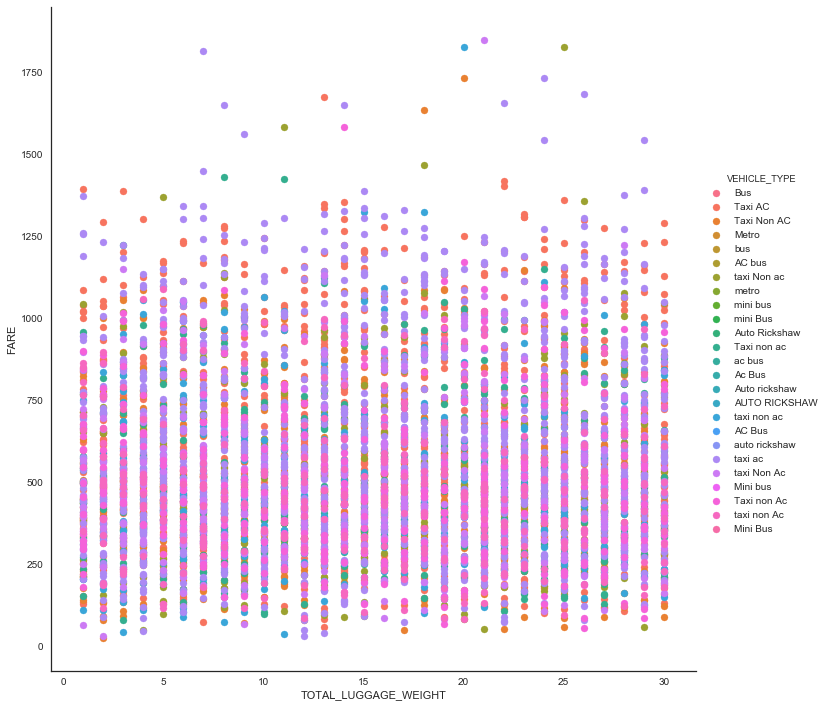

In [17]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="VEHICLE_TYPE", size=10) \
   .map(plt.scatter, "TOTAL_LUGGAGE_WEIGHT", "FARE") \
   .add_legend()

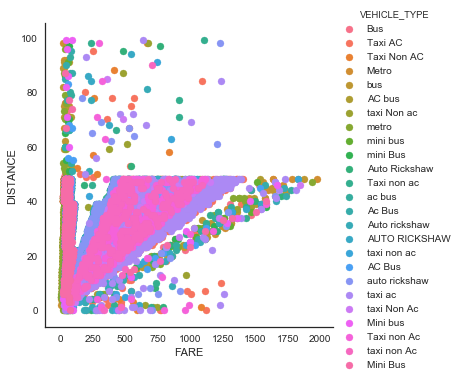

In [18]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="VEHICLE_TYPE", size=5) \
   .map(plt.scatter, "FARE","DISTANCE" ) \
   .add_legend()

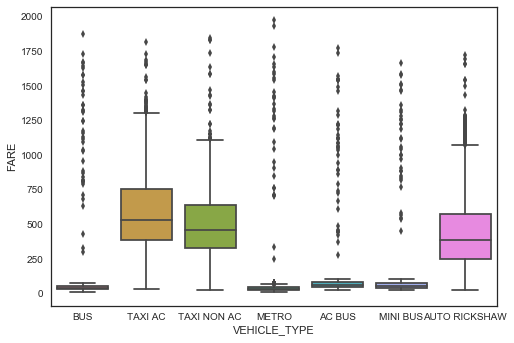

In [19]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="VEHICLE_TYPE", y="FARE", data=df)


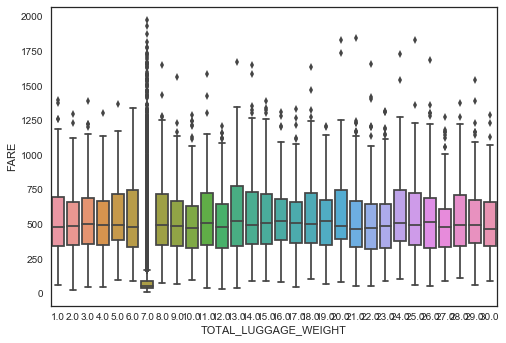

In [20]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="TOTAL_LUGGAGE_WEIGHT", y="FARE", data=df)


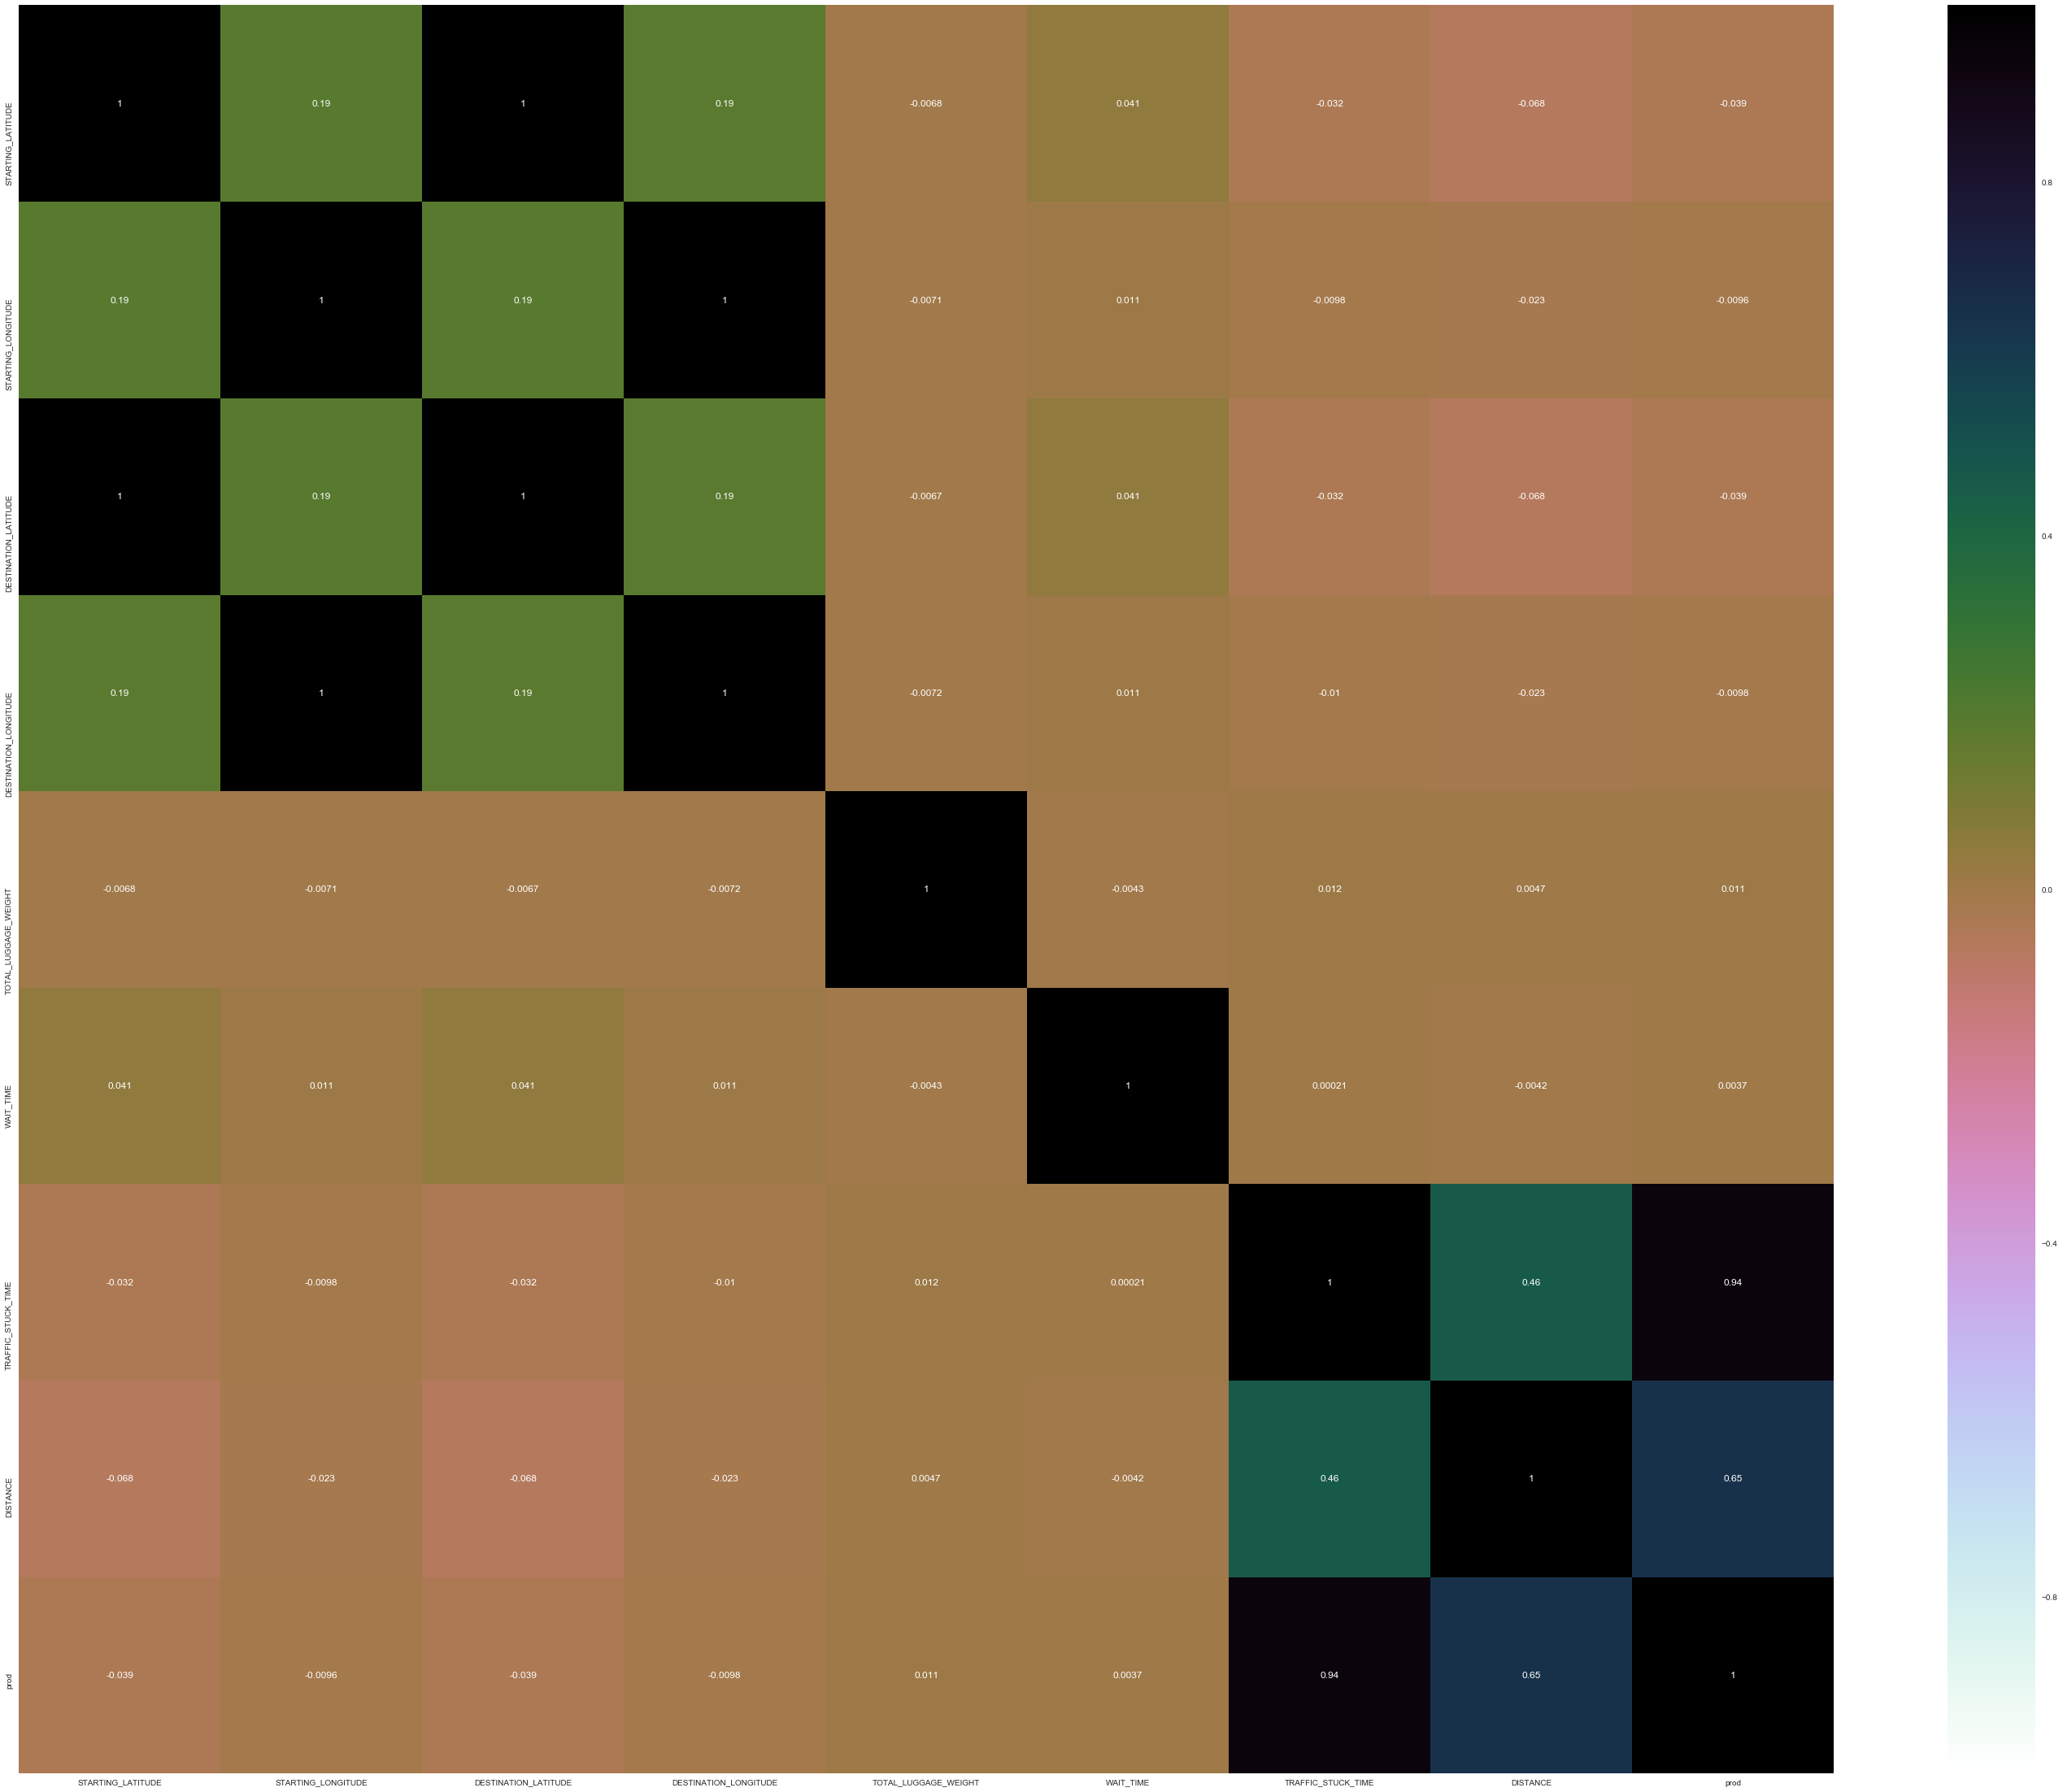

In [21]:
X=df[[
 'TIMESTAMP',
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME',
 'DISTANCE',
    'prod'
 ]]
Y=df['FARE']

plt.figure(figsize=(50,40)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [22]:
iris.describe()



,ID,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
count,19999.000000,19325.000000,19325.000000,19337.000000,19337.000000,5648.000000,5648.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,10000.276364,20.111445,79.794135,20.129680,79.793273,15.447238,9.433605,30.064053,30.542277,251.937371,1042.089904
std,5773.704756,5.908449,4.939736,5.909585,4.941561,8.558223,5.779630,21.949137,12.123217,300.070730,991.432732
min,1.000000,12.842900,72.835882,12.843029,72.835873,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,5000.500000,13.086064,77.093570,13.087377,77.087018,8.000000,4.000000,12.000000,22.000000,42.110000,252.500000
50%,10000.000000,19.231625,77.705107,19.235435,77.706558,15.000000,9.000000,26.000000,31.000000,75.330000,731.000000
75%,15000.500000,25.317237,82.990730,25.317921,82.990571,23.000000,14.000000,45.000000,40.000000,416.150000,1560.000000
max,20000.000000,28.770716,88.452179,28.770713,88.452149,30.000000,19.000000,95.000000,99.000000,1972.000000,8099.000000


In [23]:
df.isnull().sum()

ID                           0
TIMESTAMP                    0
STARTING_LATITUDE            0
STARTING_LONGITUDE           0
DESTINATION_LATITUDE         0
DESTINATION_LONGITUDE        0
VEHICLE_TYPE                 0
TOTAL_LUGGAGE_WEIGHT         0
WAIT_TIME                14095
TRAFFIC_STUCK_TIME           0
DISTANCE                     0
FARE                         0
prod                         0
dtype: int64

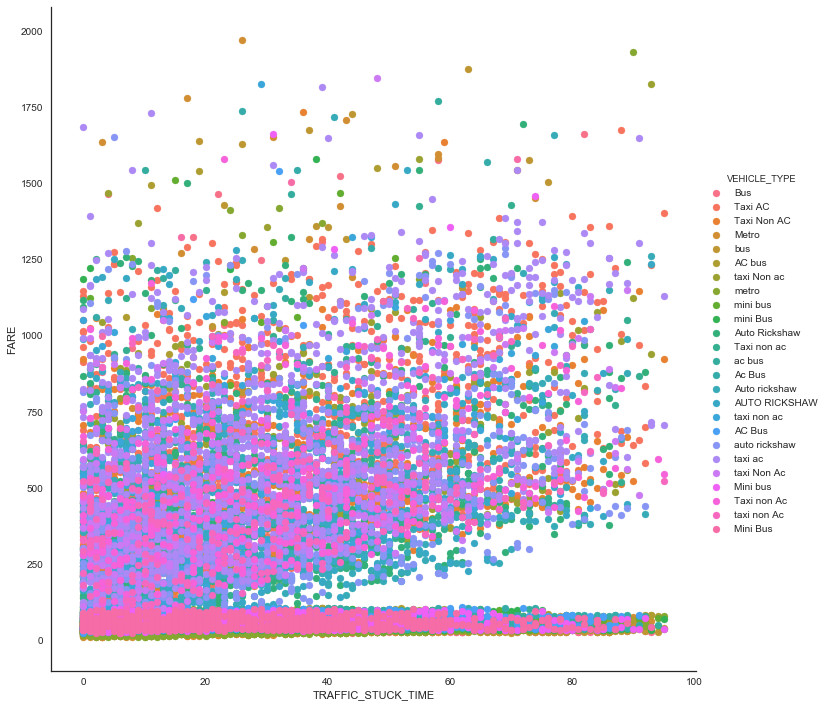

In [24]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="VEHICLE_TYPE", size=10) \
   .map(plt.scatter, "TRAFFIC_STUCK_TIME", "FARE") \
   .add_legend()

In [25]:
df['WAIT_TIME']=df['WAIT_TIME'].fillna(0)


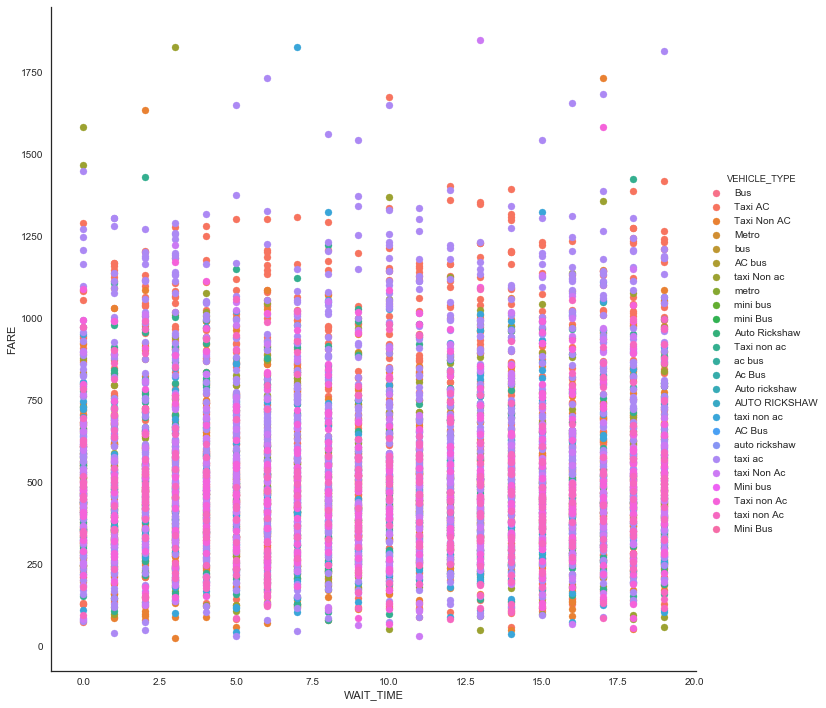

In [26]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="VEHICLE_TYPE", size=10) \
   .map(plt.scatter, "WAIT_TIME", "FARE") \
   .add_legend()

In [27]:
df.isnull().sum()

ID                       0
TIMESTAMP                0
STARTING_LATITUDE        0
STARTING_LONGITUDE       0
DESTINATION_LATITUDE     0
DESTINATION_LONGITUDE    0
VEHICLE_TYPE             0
TOTAL_LUGGAGE_WEIGHT     0
WAIT_TIME                0
TRAFFIC_STUCK_TIME       0
DISTANCE                 0
FARE                     0
prod                     0
dtype: int64

In [28]:
set(list(df['VEHICLE_TYPE']))

{'AC BUS',
 'AUTO RICKSHAW',
 'BUS',
 'METRO',
 'MINI BUS',
 'TAXI AC',
 'TAXI NON AC'}

In [29]:
target_map = {'AC BUS':3,
 'AUTO RICKSHAW':4,
 'BUS':1,
 'METRO':2,
 'MINI BUS':0,
 'TAXI AC':6,
 'TAXI NON AC':5}


In [30]:
df=df.dropna()


In [31]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

C:\Users\hp-\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
train, test = train_test_split(df, test_size = 0.3, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(13763, 13)
(5899, 13)


In [33]:
list(df)


['ID',
 'TIMESTAMP',
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME',
 'DISTANCE',
 'FARE',
 'prod']

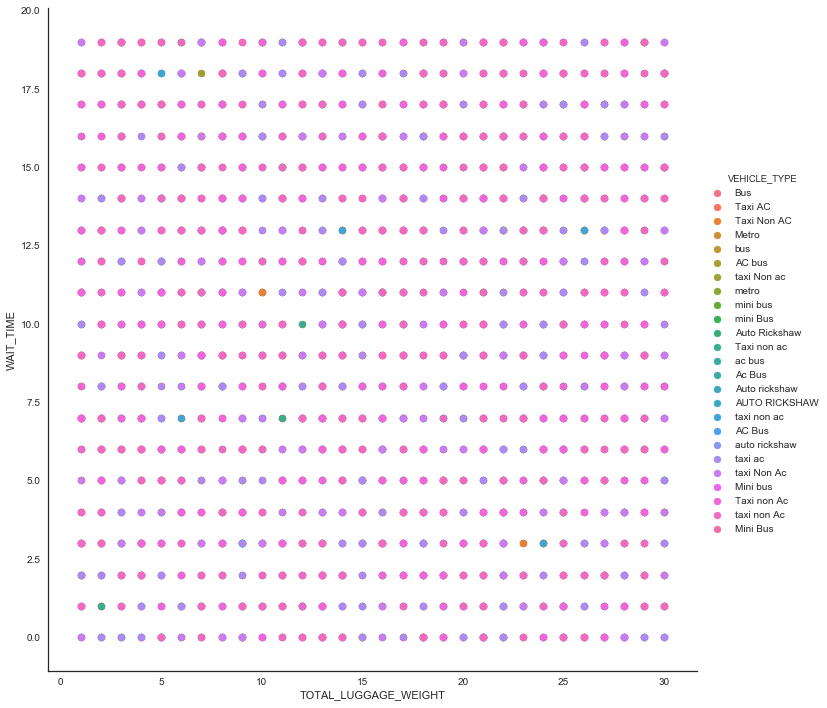

In [34]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="VEHICLE_TYPE", size=10) \
   .map(plt.scatter,"TOTAL_LUGGAGE_WEIGHT", "WAIT_TIME") \
   .add_legend()

In [35]:
train_X = train[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 
 
 
 'DISTANCE']]# taking the training data features

train_y = train[['FARE']]# output of our training data
test_X = test[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 
 
 
 'DISTANCE']]# taking the training data features
# taking test data features
test_y = test[['FARE']]   #output value of test data
df

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,3,7.0,0.0,8,34,32.09,272
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,6,7.0,9.0,66,34,985.99,2244
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,7,18.0,6.0,53,1,1085.33,53
3,4,2016-04-26 18:10:09,28.758291,77.112421,28.758384,77.011422,4,7.0,0.0,54,31,56.21,1674
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,3,7.0,0.0,33,44,30.62,1452
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,1,7.0,0.0,23,43,59.82,989
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,7,22.0,0.0,61,34,586.36,2074
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,3,7.0,0.0,28,18,32.27,504
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,6,12.0,18.0,69,43,1122.08,2967
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,4,7.0,0.0,17,19,23.54,323


In [36]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
neigh =  linear_model.LinearRegression(fit_intercept=True)#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
neigh.fit(train_X, train_y) 
prediction=neigh.predict(test_X)

#len(prediction)
len(test_y)
print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y))


The accuracy of the Logistic Regression is -1.71159240594


In [37]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,30):
    neigh = KNeighborsRegressor(n_neighbors=i,algorithm='ball_tree',weights='uniform')
#neigh.fit(tr_X, tr_y) 
    prediction=neigh.fit(train_X, train_y).predict(test_X)
    print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y),i)


The accuracy of the Logistic Regression is 0.601740970008 1
The accuracy of the Logistic Regression is 0.684609118109 2
The accuracy of the Logistic Regression is 0.698078126836 3
The accuracy of the Logistic Regression is 0.711871515512 4
The accuracy of the Logistic Regression is 0.714997173107 5
The accuracy of the Logistic Regression is 0.712677664188 6
The accuracy of the Logistic Regression is 0.711388863673 7
The accuracy of the Logistic Regression is 0.7031628585 8
The accuracy of the Logistic Regression is 0.694002849441 9
The accuracy of the Logistic Regression is 0.680371269646 10
The accuracy of the Logistic Regression is 0.662730074881 11
The accuracy of the Logistic Regression is 0.645413137835 12
The accuracy of the Logistic Regression is 0.628484542592 13
The accuracy of the Logistic Regression is 0.606207825583 14
The accuracy of the Logistic Regression is 0.589818901397 15
The accuracy of the Logistic Regression is 0.572979613128 16
The accuracy of the Logistic Regres

In [38]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
from sklearn.neighbors import KNeighborsRegressor

#for i in range(1,100):
neigh = linear_model.SGDRegressor()
#neigh.fit(tr_X, tr_y) 
prediction=neigh.fit(train_X, train_y).predict(test_X)
print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y))


The accuracy of the Logistic Regression is -25.9673402893


In [1654]:
from sklearn import linear_model
k=0.9
from sklearn.decomposition import PCA
pca = PCA(n_components=8)


#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
neigh.fit(train_X, train_y) 
prediction=neigh.predict(test_X)
####
k=4
tr=df
tE=pd.read_csv('intracity_fare_test.csv')
te=pd.DataFrame(tE)
model=linear_model.LinearRegression()
tr_X = tr[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME',
 'DISTANCE']]# taking the training data features

tr_y = tr[['FARE']]# output of our training data
#######
te['VEHICLE_TYPE']=te['VEHICLE_TYPE'].apply(lambda x: x.upper())
te['TOTAL_LUGGAGE_WEIGHT']=te['TOTAL_LUGGAGE_WEIGHT'].fillna(7)
te['WAIT_TIME']=te['WAIT_TIME'].fillna(15.5)
target_map = {'AC BUS':3,
 'AUTO RICKSHAW':4,
 'BUS':1,
 'METRO':2,
 'MINI BUS':0,
 'TAXI AC':6,
 'TAXI NON AC':5}
te['VEHICLE_TYPE']=te['VEHICLE_TYPE'].apply(lambda x: target_map[x])
te=te.dropna()
te_X = te[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME','DISTANCE']]
#te_y = te.price_range   #output value of test data
#######
#pca.fit(tr_X)
#tr_X_t=pca.transform(tr_X)
#model.fit(tr_X_t,tr_y)
#te_X_t=pca.transform(te_X)
#prediction = model.predict(te_X_t)

#prediction
#pred=pd.DataFrame(prediction)
#pred.index=pred.index+1
#pred.to_csv(path_or_buf='answer4.csv',header=['FARE'],mode='w',index_label='ID')


# taking test data features
#test_y = test[['FARE']]   #output value of test data
#te_y = te.FARE   #output value of test data
model.fit(tr_X,tr_y)
prediction = model.predict(te_X)
prediction
pred=pd.DataFrame(prediction)
pred.index=pred.index+1
pred.to_csv(path_or_buf='answer4.csv',header=['FARE'],mode='w',index_label='ID')


In [1655]:
df

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,prod
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,1,7.0,0.0,8,34,32.09,272
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,6,7.0,9.0,66,34,985.99,2244
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,5,18.0,6.0,53,1,1085.33,53
3,4,2016-04-26 18:10:09,28.758291,77.112421,28.758384,77.011422,2,7.0,0.0,54,31,56.21,1674
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,1,7.0,0.0,33,44,30.62,1452
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,3,7.0,0.0,23,43,59.82,989
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,5,22.0,0.0,61,34,586.36,2074
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,1,7.0,0.0,28,18,32.27,504
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,6,12.0,18.0,69,43,1122.08,2967
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,2,7.0,0.0,17,19,23.54,323


In [1656]:
tE=pd.read_csv('intracity_fare_test.csv')
te=pd.DataFrame(tE)
te.isnull().sum()

ID                           0
TIMESTAMP                    0
STARTING_LATITUDE            0
STARTING_LONGITUDE           0
DESTINATION_LATITUDE         0
DESTINATION_LONGITUDE        0
VEHICLE_TYPE                 0
TOTAL_LUGGAGE_WEIGHT     14261
WAIT_TIME                14261
TRAFFIC_STUCK_TIME           0
DISTANCE                     0
dtype: int64

In [1657]:
from sklearn import linear_model
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
#neigh.fit(train_X, train_y) 
#prediction=neigh.predict(test_X)
####
k=4
tr=df
tE=pd.read_csv('intracity_fare_test.csv')
te=pd.DataFrame(tE)
model=linear_model.Lasso()
tr_X = tr[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME',
 'DISTANCE']]# taking the training data features

tr_y = tr[['FARE']]# output of our training data
te['VEHICLE_TYPE']=te['VEHICLE_TYPE'].apply(lambda x: x.upper())
te['TOTAL_LUGGAGE_WEIGHT']=te['TOTAL_LUGGAGE_WEIGHT'].fillna(15)
te['WAIT_TIME']=te['WAIT_TIME'].fillna(9)
target_map = {'AC BUS':3,
 'AUTO RICKSHAW':4,
 'BUS':1,
 'METRO':2,
 'MINI BUS':0,
 'TAXI AC':6,
 'TAXI NON AC':5}
te['VEHICLE_TYPE']=te['VEHICLE_TYPE'].apply(lambda x: target_map[x])
te=te.dropna()
te
te_X = te[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 'TOTAL_LUGGAGE_WEIGHT',
 'WAIT_TIME',
 'TRAFFIC_STUCK_TIME',
 'DISTANCE']]# taking the training data features


# taking test data features
#test_y = test[['FARE']]   #output value of test data
#te_y = te.price_range   #output value of test data
model.fit(tr_X,tr_y)
prediction = model.predict(te_X)
prediction
pred=pd.DataFrame(prediction)
pred.index=pred.index+1
pred.to_csv(path_or_buf='answer2.csv',header=['FARE'],mode='w',index_label='ID')


In [1665]:
from sklearn import linear_model
k=0.9
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
# imputing missing destination coordinates
#print(df.shape)

# print(interfare[temp])
#df.dropna()

#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
####
k=4
tr=df
tE=pd.read_csv('intracity_fare_test.csv')
te=pd.DataFrame(tE)

model=linear_model.LogisticRegression()
tr_X = tr[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 

 
 'DISTANCE']]# taking the training data features

tr_y = tr[['FARE']]# output of our training data
#######
te.dropna(subset=['STARTING_LATITUDE', 'DESTINATION_LATITUDE'], how='all',inplace=True)
#print(df.shape)
te[['STARTING_LATITUDE','DESTINATION_LATITUDE']] = te[['STARTING_LATITUDE','DESTINATION_LATITUDE']].fillna(value=0)

temp = te['DESTINATION_LATITUDE']==0
# print(interfare[temp])
te.loc[temp,'DESTINATION_LATITUDE'],te.loc[temp, 'DESTINATION_LONGITUDE'] = latlon(te.loc[temp,'STARTING_LATITUDE'], te.loc[temp,'STARTING_LONGITUDE'], te.loc[temp,'DISTANCE']/2)
temp = te['STARTING_LATITUDE']==0
te.loc[temp,'STARTING_LATITUDE'],te.loc[temp, 'STARTING_LONGITUDE'] = latlon(te.loc[temp,'DESTINATION_LATITUDE'], te.loc[temp,'DESTINATION_LONGITUDE'], te.loc[temp,'DISTANCE']/2)

te['VEHICLE_TYPE']=te['VEHICLE_TYPE'].apply(lambda x: x.upper())
te['TOTAL_LUGGAGE_WEIGHT']=te['TOTAL_LUGGAGE_WEIGHT'].fillna(7)
te['WAIT_TIME']=te['WAIT_TIME'].fillna(0)
target_map = {'AC BUS':3,
 'AUTO RICKSHAW':4,
 'BUS':1,
 'METRO':2,
 'MINI BUS':0,
 'TAXI AC':6,
 'TAXI NON AC':5}
te['VEHICLE_TYPE']=te['VEHICLE_TYPE'].apply(lambda x: target_map[x])
te=te.dropna()
te_X = te[[
 'STARTING_LATITUDE',
 'STARTING_LONGITUDE',
 'DESTINATION_LATITUDE',
 'DESTINATION_LONGITUDE',
 'VEHICLE_TYPE',
 
 
 
 'DISTANCE']]# taking the training data features


from sklearn.neighbors import KNeighborsRegressor

#for i in range(1,10):
neigh = KNeighborsRegressor(n_neighbors=17,algorithm='auto',weights='uniform')
#neigh.fit(tr_X, tr_y) 
prediction=neigh.fit(tr_X, tr_y).predict(te_X)
#print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))
pred=pd.DataFrame(prediction)
pred.index=pred.index+1
# do for 12 and 13
pred.to_csv(path_or_buf='answer4_27.csv',header=['FARE'],mode='w',index_label='ID')
